In [4]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

In [5]:
data = pd.read_csv("./Raemian_final.csv")

In [6]:
data

계약년월  건축년도 매칭 구 건설수주_건축(단위 백만원) 건설수주_주택(단위 백만원)  매매가격지수(아파트)  \
0     202101  2020  강남구      10,589,107       6,436,523         97.0   
1     202105  2020  강남구      11,699,841       5,568,538         99.0   
2     202105  2020  강남구      11,699,841       5,568,538         99.0   
3     202105  2020  강남구      11,699,841       5,568,538         99.0   
4     202105  2020  강남구      11,699,841       5,568,538         99.0   
...      ...   ...  ...             ...             ...          ...   
7857  202011  2011   중구      13,510,590       8,663,124         96.4   
7858  202012  2011   중구      22,231,493      15,138,239         96.6   
7859  202012  2011   중구      22,231,493      15,138,239         96.6   
7860  202012  2011   중구      22,231,493      15,138,239         96.6   
7861  202012  2011   중구      22,231,493      15,138,239         96.6   

     경상수지(백만불) 무역수지(백만불) 대출금액(아파트)(억원) 대출잔액(아파트)(억원)  ... NASDAQ_change_rate  \
0        5,762     3,550     25,979.03     22,748.79  ...           0.044976   
1       11,307     2,814     21,924.71     19,920.09  ...          -0.027352   
2       11,307     2,814     21,924.71     19,920.09  ...          -0.027352   
3       11,307     2,814     21,924.71     19,920.09  ...          -0.027352   
4       11,307     2,814     21,924.71     19,920.09  ...          -0.027352   
...        ...       ...           ...           ...  ...                ...   
7857     9,619     5,807     26,045.45     22,428.73  ...           0.031414   
7858    12,063     6,694     34,654.82     29,943.84  ...           0.069913   
7859    12,063     6,694     34,654.82     29,943.84  ...           0.069913   
7860    12,063     6,694     34,654.82     29,943.84  ...           0.069913   
7861    12,063     6,694     34,654.82     29,943.84  ...           0.069913   

      DOW Jones_close  DOW Jones_change_rate  KRX300_close  \
0         30821.35259               0.022315       1847.35   
1         34270.30859               0.013816       1932.64   
2         34270.30859               0.013816       1932.64   
3         34270.30859               0.013816       1932.64   
4         34270.30859               0.013816       1932.64   
...               ...                    ...           ...   
7857      29124.03662               0.039955       1593.06   
7858      30148.57990               0.035179       1794.81   
7859      30148.57990               0.035179       1794.81   
7860      30148.57990               0.035179       1794.81   
7861      30148.57990               0.035179       1794.81   

      KRX300_change_rate  KOSPI_close  KOSPI_change_rate  KOSDAQ_close  \
0                   2.93      2976.21               3.58        928.73   
1                   1.04      3203.92               1.78        981.78   
2                   1.04      3203.92               1.78        981.78   
3                   1.04      3203.92               1.78        981.78   
4                   1.04      3203.92               1.78        981.78   
...                  ...          ...                ...           ...   
7857               14.43      2591.34              14.30        886.11   
7858               12.66      2873.47              10.89        968.42   
7859               12.66      2873.47              10.89        968.42   
7860               12.66      2873.47              10.89        968.42   
7861               12.66      2873.47              10.89        968.42   

      KOSDAQ_change_rate           평당가  
0                  -4.10  10829.091880  
1                  -0.17  10932.076100  
2                  -0.17  11899.038460  
3                  -0.17  10932.076100  
4                  -0.17  11899.038460  
...                  ...           ...  
7857               11.79   5744.894543  
7858                9.29   5634.415802  
7859                9.29   5855.373284  
7860                9.29   4970.581313  
7861                9.29   4912.910439  

[7862 rows x 42 columns]

In [7]:
print(data["매칭 구"].unique())

['강남구' '강동구' '강북구' '광진구' '구로구' '노원구' '동대문구' '동작구' '마포구' '서대문구' '서초구' '성동구'
 '성북구' '송파구' '양천구' '영등포구' '용산구' '은평구' '중구']


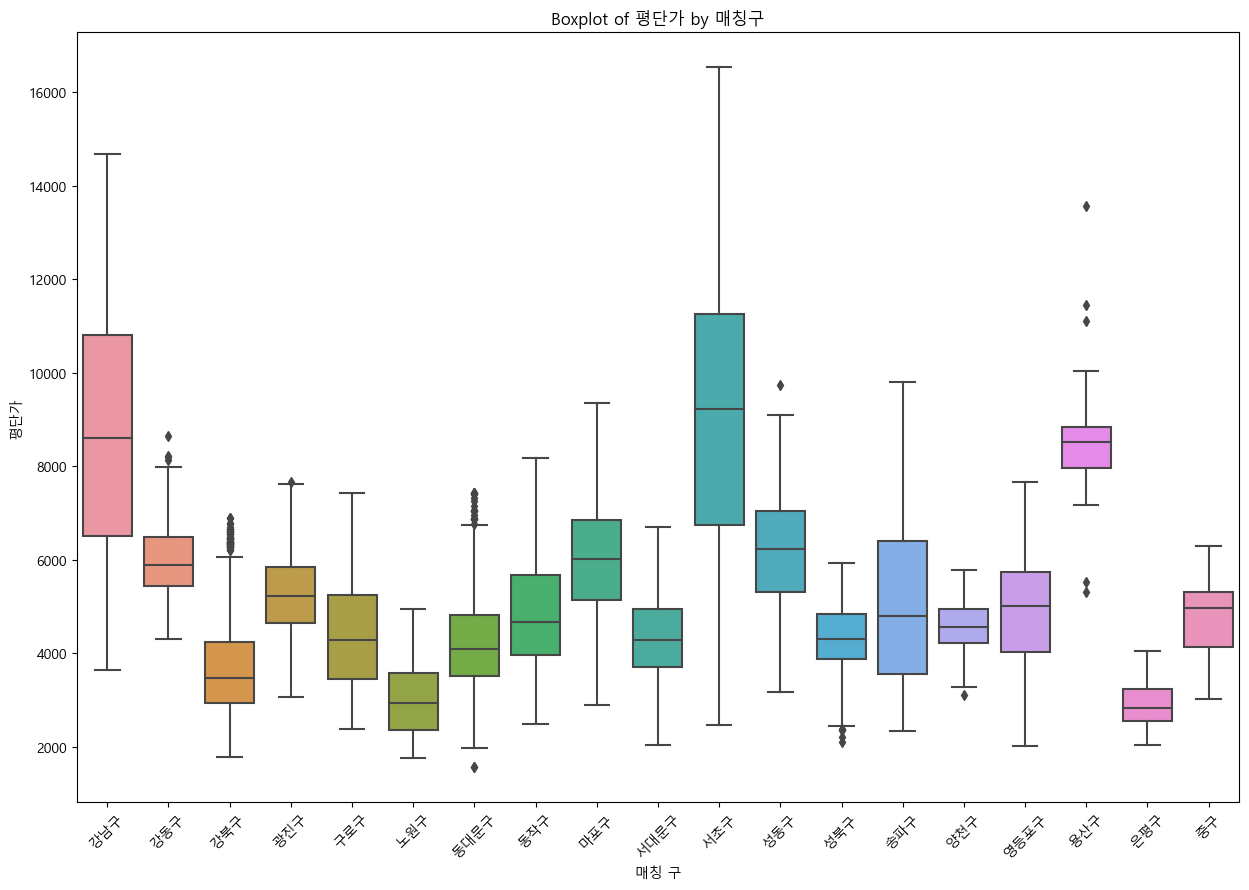

매칭 구
강남구     8643.719014
강동구     5995.370427
강북구     3555.823716
광진구     5312.396082
구로구     4439.677902
노원구     3028.160039
동대문구    4196.714011
동작구     4883.203924
마포구     5995.213980
서대문구    4354.542559
서초구     8802.682454
성동구     6204.758752
성북구     4333.656900
송파구     5038.167361
양천구     4603.582286
영등포구    4958.265987
용산구     8481.974811
은평구     2914.569622
중구      4775.975229
Name: 평당가, dtype: float64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Converting '평단가' to numeric (as it seems to be a string)
data['평당가'] = pd.to_numeric(data['평당가'], errors='coerce')

# Grouping data by '매칭구'
grouped_data = data.groupby('매칭 구')

# Creating boxplots for each group's '평단가' to visualize outliers
plt.figure(figsize=(15,10))
sns.boxplot(x='매칭 구', y='평당가', data=data)
plt.xticks(rotation=45)
plt.title('Boxplot of 평단가 by 매칭구')
plt.ylabel('평단가')
plt.xlabel('매칭 구')
plt.show()

# Identifying and removing outliers for each group in '평단가'
# Using IQR (Interquartile Range) method
cleaned_data = pd.DataFrame()
for name, group in grouped_data:
    Q1 = group['평당가'].quantile(0.25)
    Q3 = group['평당가'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_group = group[(group['평당가'] >= lower_bound) & (group['평당가'] <= upper_bound)]
    cleaned_data = pd.concat([cleaned_data, filtered_group], axis=0)

# Calculating the mean of '평단가' for each group in the cleaned data
mean_prices = cleaned_data.groupby('매칭 구')['평당가'].mean()
mean_prices


##이상치를 제거한, 0.25~0.75만 확인해보기!

하위 25% :  6506.4915492499995
상위 25% :  10805.353935
강남구 평균 평당가:  8643.719014115162
강남구 전체 개수 : 686
강남구 필터링 개수 686
이상치 개수(제거) : 0


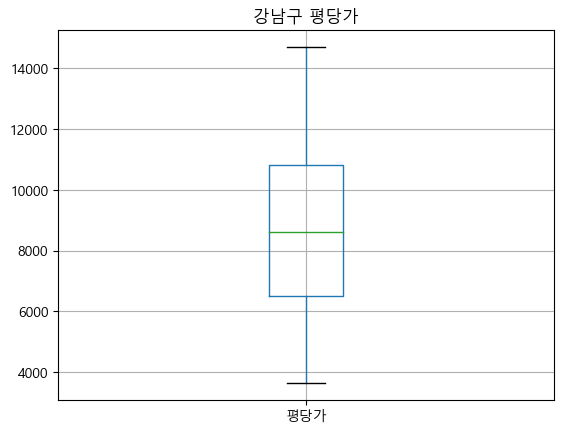

하위 25% :  5441.696113
상위 25% :  6496.4663825
강동구 평균 평당가:  6018.671145381313
강동구 전체 개수 : 396
강동구 필터링 개수 392
이상치 개수(제거) : 4


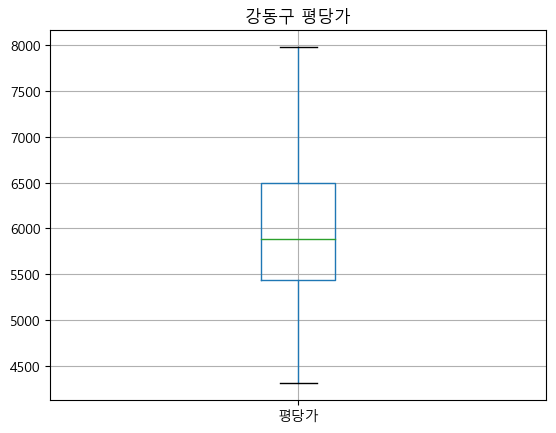

하위 25% :  2932.8105195
상위 25% :  4242.7222255
강북구 평균 평당가:  3721.8485066925878
강북구 전체 개수 : 823
강북구 필터링 개수 776
이상치 개수(제거) : 47


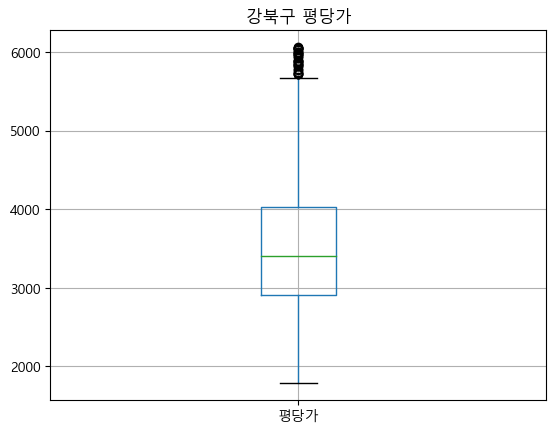

하위 25% :  4645.63025925
상위 25% :  5857.3948224999995
광진구 평균 평당가:  5319.733542807454
광진구 전체 개수 : 322
광진구 필터링 개수 321
이상치 개수(제거) : 1


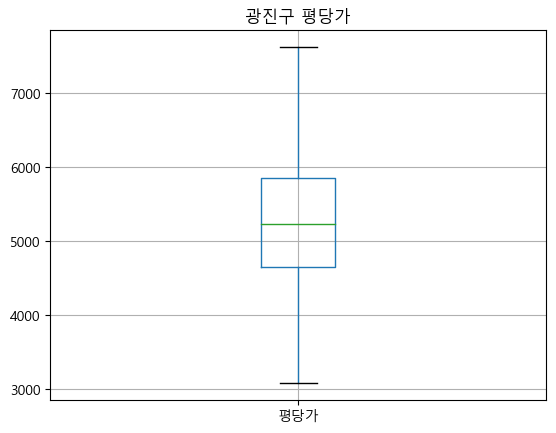

하위 25% :  3448.56917325
상위 25% :  5242.409979
구로구 평균 평당가:  4439.677901950414
구로구 전체 개수 : 242
구로구 필터링 개수 242
이상치 개수(제거) : 0


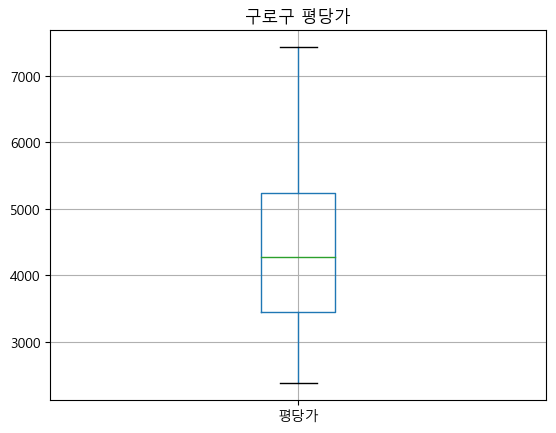

하위 25% :  2355.530026
상위 25% :  3580.681783
노원구 평균 평당가:  3028.1600392222217
노원구 전체 개수 : 135
노원구 필터링 개수 135
이상치 개수(제거) : 0


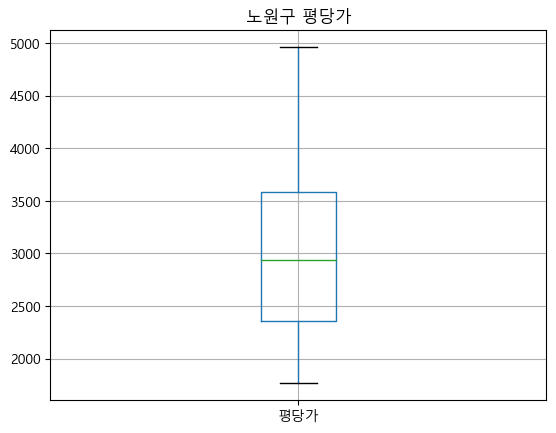

하위 25% :  3527.87913775
상위 25% :  4820.692355499999
동대문구 평균 평당가:  4254.6063409524395
동대문구 전체 개수 : 820
동대문구 필터링 개수 800
이상치 개수(제거) : 20


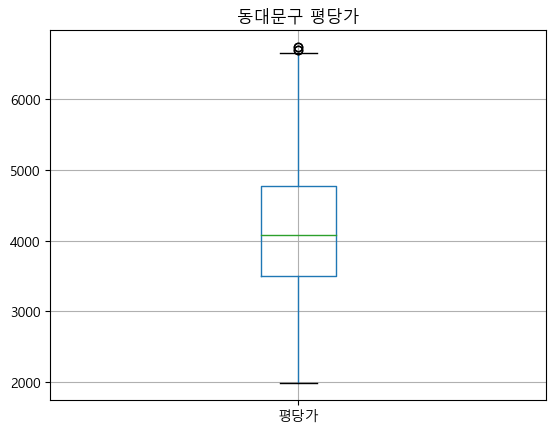

하위 25% :  3975.7832945
상위 25% :  5669.56931
동작구 평균 평당가:  4883.203923665871
동작구 전체 개수 : 419
동작구 필터링 개수 419
이상치 개수(제거) : 0


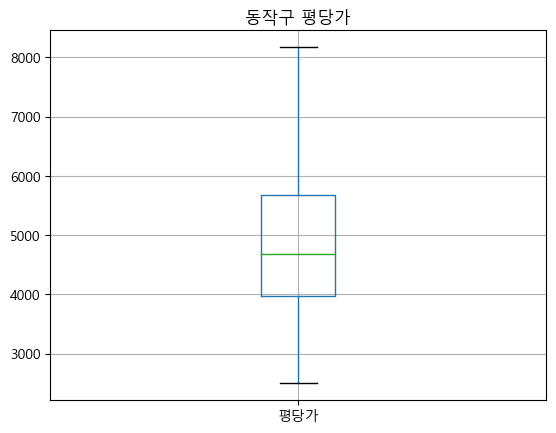

하위 25% :  5146.78688375
상위 25% :  6843.4445157499995
마포구 평균 평당가:  5995.21397973
마포구 전체 개수 : 1100
마포구 필터링 개수 1100
이상치 개수(제거) : 0


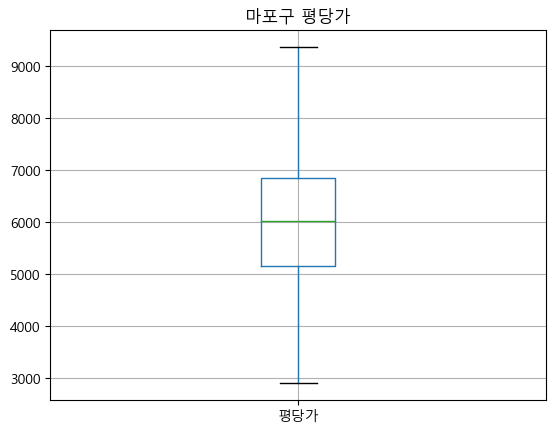

하위 25% :  3716.836309
상위 25% :  4957.9781570000005
서대문구 평균 평당가:  4354.5425593159725
서대문구 전체 개수 : 576
서대문구 필터링 개수 576
이상치 개수(제거) : 0


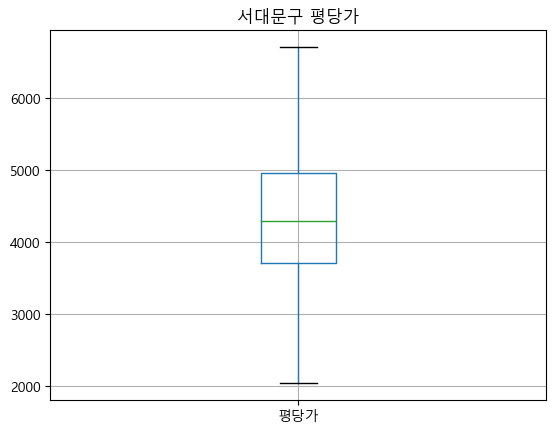

하위 25% :  6751.2007995
상위 25% :  11248.7917325
서초구 평균 평당가:  8802.68245402669
서초구 전체 개수 : 562
서초구 필터링 개수 562
이상치 개수(제거) : 0


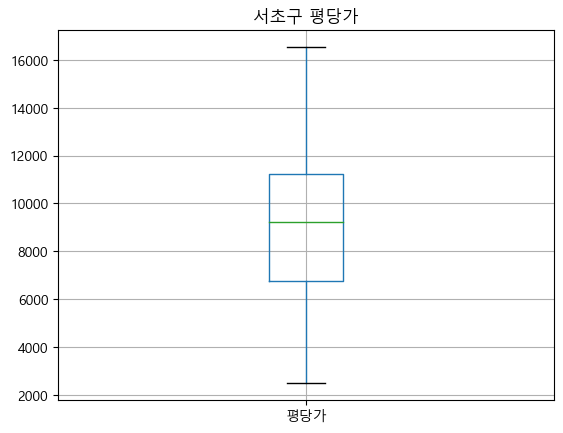

하위 25% :  5314.387211
상위 25% :  7041.173529
성동구 평균 평당가:  6220.226335423582
성동구 전체 개수 : 229
성동구 필터링 개수 228
이상치 개수(제거) : 1


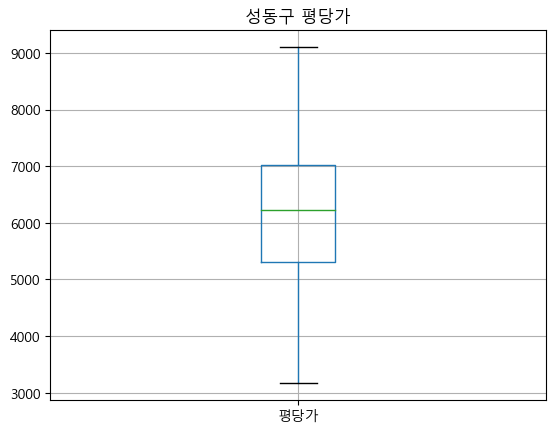

하위 25% :  3871.138882
상위 25% :  4847.270906
성북구 평균 평당가:  4319.467225574203
성북구 전체 개수 : 721
성북구 필터링 개수 716
이상치 개수(제거) : 5


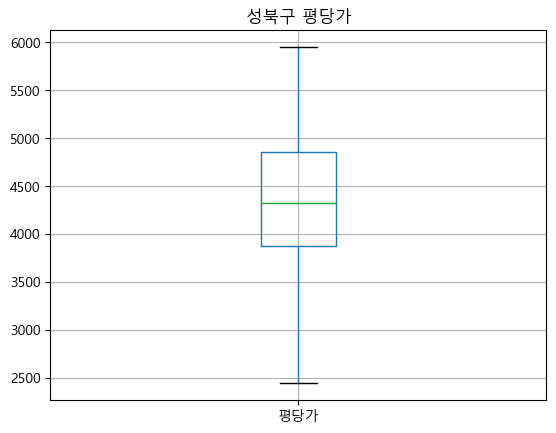

하위 25% :  3562.993454
상위 25% :  6413.957718
송파구 평균 평당가:  5038.167361187739
송파구 전체 개수 : 261
송파구 필터링 개수 261
이상치 개수(제거) : 0


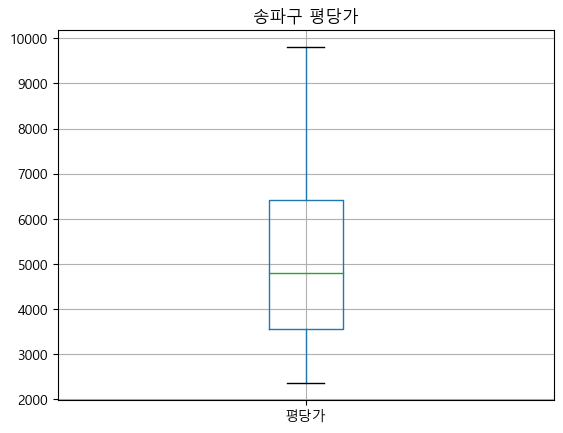

하위 25% :  4029.96349
상위 25% :  5751.12604175
영등포구 평균 평당가:  4958.2659869430045
영등포구 전체 개수 : 386
영등포구 필터링 개수 386
이상치 개수(제거) : 0


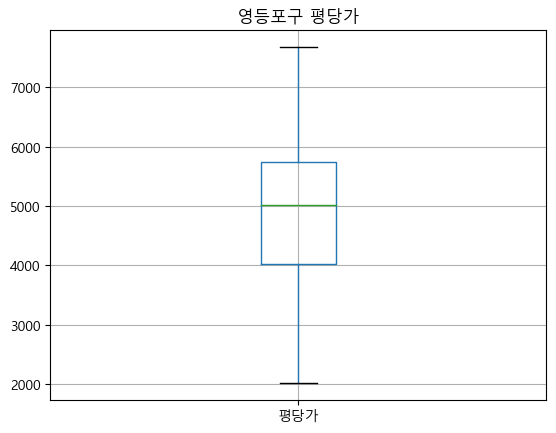

하위 25% :  7959.861993750001
상위 25% :  8837.100121
용산구 평균 평당가:  8595.531619124999
용산구 전체 개수 : 40
용산구 필터링 개수 35
이상치 개수(제거) : 5


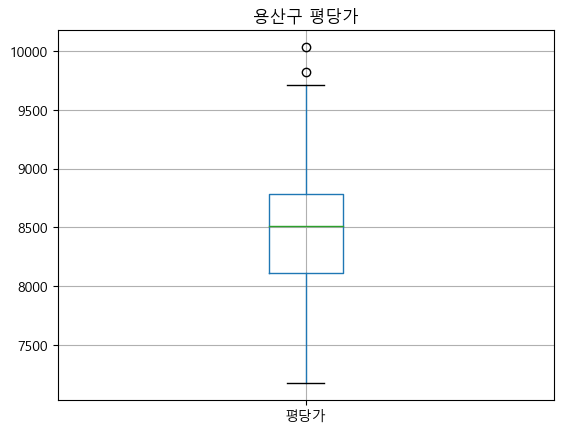

하위 25% :  2560.65895575
상위 25% :  3243.01626575
은평구 평균 평당가:  2914.569621552632
은평구 전체 개수 : 38
은평구 필터링 개수 38
이상치 개수(제거) : 0


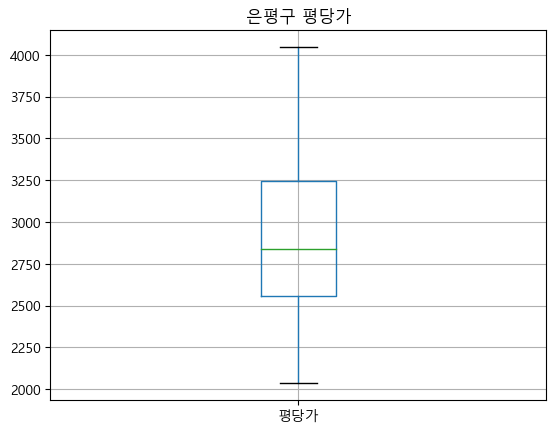

하위 25% :  4229.76964
상위 25% :  4945.747017
양천구 평균 평당가:  4565.591307564103
양천구 전체 개수 : 39
양천구 필터링 개수 38
이상치 개수(제거) : 1


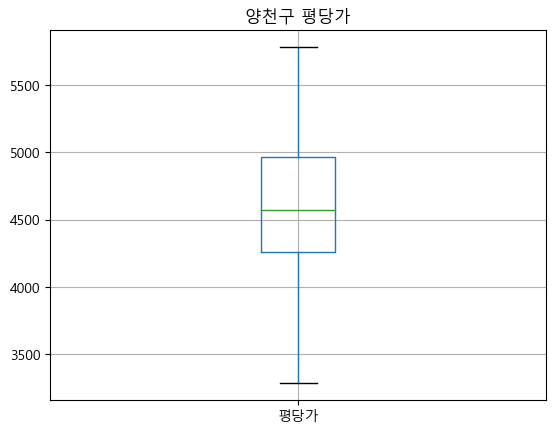

하위 25% :  4132.281982
상위 25% :  5320.075312
중구 평균 평당가:  4775.975228985075
중구 전체 개수 : 67
중구 필터링 개수 67
이상치 개수(제거) : 0


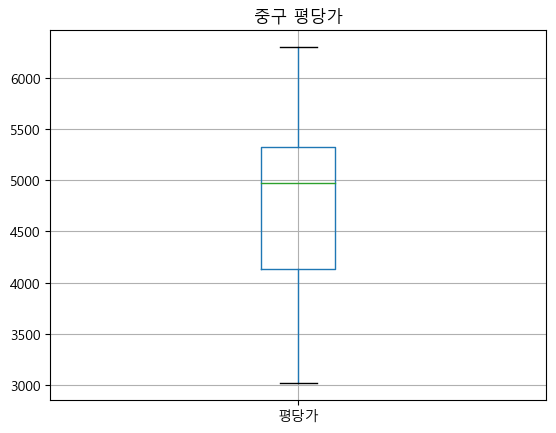

---------------------------------------
전체 시각화


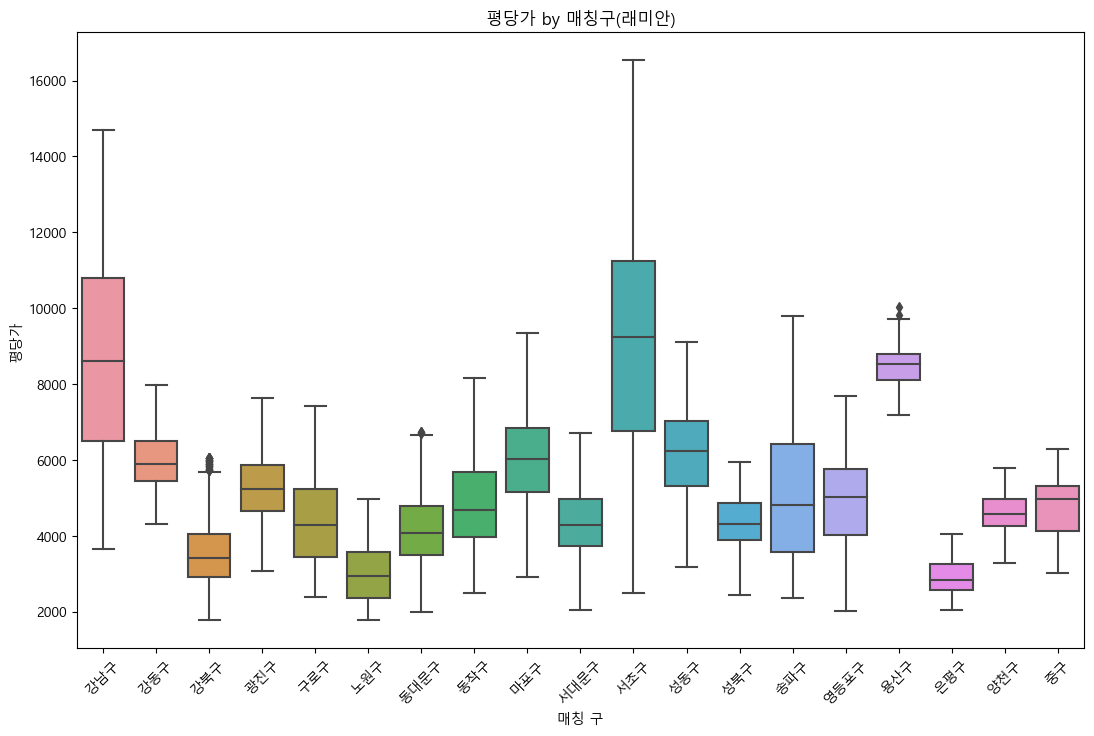

In [9]:
'''
매칭구, 각 구별 총 개수, 각 구별 이상치 개수, 각 구별 시각화, 각 구별 평단가, 전체 시각화
'''
filtered_data_total = pd.DataFrame()
def visualize(data, group):
    data = data[data['매칭 구'] == group]
    # low_limit = data["평당가"].quantile(0.25)
    # upper_limit = data['평당가'].quantile(0.75)

    Q1 = data["평당가"].quantile(0.25)
    Q3 = data["평당가"].quantile(0.75)
    IQR = Q3 - Q1
    

    # filtered_data = data[(data["평당가"] >= low_limit) & (data["평당가"] <= upper_limit)] #형준 수식(무작정 지우는 것)
    filtered_data = data[~((data['평당가'] < (Q1 - 1.5 * IQR)) | (data['평당가'] > (Q3 + 1.5 * IQR)))] #희진 수식
    #튀어나오는 값 있지만, 정상 범위내에 있다고 판단.
    global filtered_data_total
    filtered_data_total = pd.concat([filtered_data_total, filtered_data], ignore_index=True)
    
    outliers_count = len(data) - len(filtered_data)

    filtered_data_total.append(data, ignore_index=True)
    
    print("하위 25% : ", Q1)
    print("상위 25% : ", Q3)
    print(f"{group} 평균 평당가: ", data['평당가'].mean())
    print(f"{group} 전체 개수 :", len(data))
    print(f"{group} 필터링 개수", len(filtered_data))
    print("이상치 개수(제거) :", outliers_count) #이미 정수 개수




    #개별 box plot 그리기
    filtered_data.boxplot(column = "평당가")
    plt.title(f"{group} 평당가") #0.25~0.75% 사이 1차 필터링
    plt.show()

group = ['강남구', '강동구', '강북구', '광진구', '구로구', '노원구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '영등포구', '용산구', '은평구', '양천구', '중구']

for i in group:
    visualize(data, i)

print("---------------------------------------")
print("전체 시각화")


plt.figure(figsize=(13,8))
sns.boxplot(x="매칭 구", y="평당가", data=filtered_data_total)
plt.xticks(rotation = 45)
plt.title("평당가 by 매칭구(래미안)")
plt.ylabel("평당가")
plt.xlabel("매칭 구")
plt.show()

